<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>

Predicting yield helps the state to get an estimate of the crop in a
certain year to control the price rates.This model focuses on predicting the crop yield in advance by analyzing
factors like location, season, and crop type  through machine learning techniques on
previously collected datasets.

In [3]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the dataset

crop_data=pd.read_csv("crop_production.csv")
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2019,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2019,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2019,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2019,Winter,Rice,279151.0,597899.0


In [5]:
crop_data.shape

#rows X columns

(246091, 7)

In [6]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [7]:
# statistical inference of the dataset

crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2010.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,2002.000000,4.000000e-02,0.000000e+00
25%,2007.000000,8.000000e+01,8.800000e+01
50%,2011.000000,5.820000e+02,7.290000e+02
75%,2015.000000,4.392000e+03,7.023000e+03
max,2020.000000,8.580100e+06,1.250800e+09


In [8]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
# Dropping missing values 
crop_data = crop_data.dropna()
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2019,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2019,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2019,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2019,Winter,Rice,279151.0,597899.0


In [10]:
#checking
crop_data.isnull().values.any()


False

In [11]:
# Displaying State Names present in the dataset
crop_data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [12]:
# Adding a new column Yield which indicates Production per unit Area. 

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10) 

C:\Users\bipul\AppData\Local\Temp\ipykernel_17508\416474790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Tapioca,40.0,169.0,4.225000


In [13]:
# Visualizing the features

# ax = sns.pairplot(crop_data)
# ax

In [14]:
# Dropping unnecessary columns

data = crop_data.drop(['State_Name'], axis = 1)

In [15]:
data.corr()

,Crop_Year,Area,Production,Yield
Crop_Year,1.000000,-0.025305,0.006989,0.013499
Area,-0.025305,1.000000,0.040587,0.001822
Production,0.006989,0.040587,1.000000,0.330961
Yield,0.013499,0.001822,0.330961,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

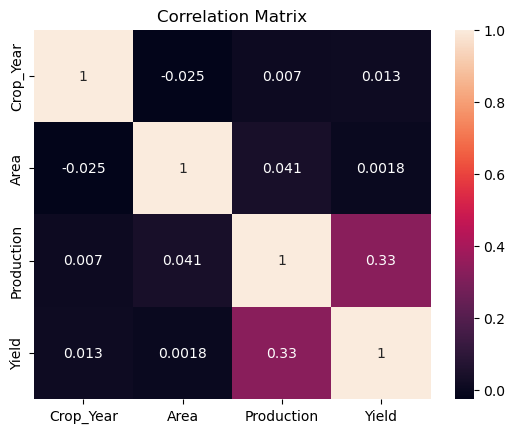

In [16]:
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

In [17]:
dummy = pd.get_dummies(data)
dummy


,Crop_Year,Area,Production,Yield,District_Name_24 PARAGANAS NORTH,District_Name_24 PARAGANAS SOUTH,District_Name_ADILABAD,District_Name_AGAR MALWA,District_Name_AGRA,District_Name_AHMADABAD,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2005,1254.0,2000.0,1.594896,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2005,2.0,1.0,0.500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2005,102.0,321.0,3.147059,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2005,176.0,641.0,3.642045,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2005,720.0,165.0,0.229167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2019,306.0,801.0,2.617647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,2019,627.0,463.0,0.738437,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,2019,324.0,16250.0,50.154321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,2019,279151.0,597899.0,2.141848,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b><i> Splitting dataset into train and test dataset </i></b>

In [18]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 778)
x_test : (60591, 778)
y_train : (181770,)
y_test : (60591,)


In [19]:
print(x_train)
print(y_train)

        Crop_Year    Area  District_Name_24 PARAGANAS NORTH  \
201072       2018    16.0                                 0   
191897       2003  5400.0                                 0   
43814        2005  2968.0                                 0   
32815        2018   211.0                                 0   
62249        2011  1700.0                                 0   
...           ...     ...                               ...   
236131       2005   207.0                                 0   
127145       2012    39.0                                 0   
20536        2010    43.0                                 0   
18709        2016  2489.0                                 0   
35767        2004    67.0                                 0   

        District_Name_24 PARAGANAS SOUTH  District_Name_ADILABAD  \
201072                                 0                       0   
191897                                 0                       0   
43814                                  

<b><h3> Linear Regression </b></h3>

In [20]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

array([ -150424.1413335 ,   485380.56767824, -1269080.84029967, ...,
         141974.1096947 , -1736536.69723992,   287191.55638482])

In [22]:
model.score(x_test,y_test)

0.17831996777017667

In [23]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.17831996777017667


Text(0.5, 1.0, 'Linear Regression')

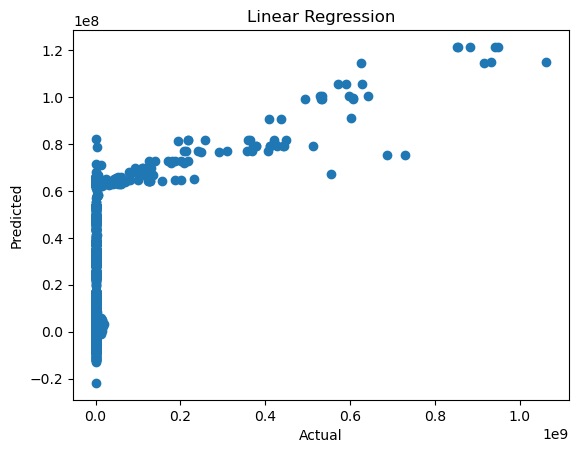

In [24]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.

<b> Assumptions of Linear Regression </b>
<ol>
    <li> Linearity.</li>
    <li> Homoscedasticity </li>
    <li> Multivariate normality </li>
    <li> Lack of multicollinearity </li>
    


# R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. 
# This tells us how well the unknown samples will be predicted by our model.

<b><h3> Random Forest Algorithm </h3></b>

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([ 3762.94545455,   709.90909091,  2108.18181818, ...,
         240.27272727, 10788.42727273,   109.09090909])

In [26]:
model.score(x_test,y_test)

0.9454192224801132

In [27]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9454192224801132


In [28]:
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.16763202780704545


C:\Users\bipul\AppData\Local\Temp\ipykernel_17508\551929062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\bipul\AppData\Local\Temp\ipykernel_17508\551929062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

Text(0.5, 1.0, 'Random Forest Regression')

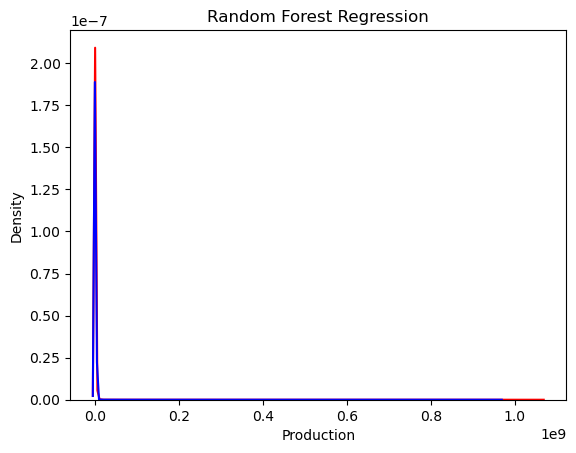

In [29]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b> 



1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(svr_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Support Vector Regression')

<b> Decision Tree </b>

In [30]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([3900.,  700., 2377., ...,   84., 9656.,  100.])

In [31]:
regressor.score(x_test,y_test)

0.9564181540365296

In [32]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9564181540365296


In [33]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.16763202780704545


C:\Users\bipul\AppData\Local\Temp\ipykernel_17508\697514152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\bipul\AppData\Local\Temp\ipykernel_17508\697514152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

Text(0.5, 1.0, 'Decision Tree Regression')

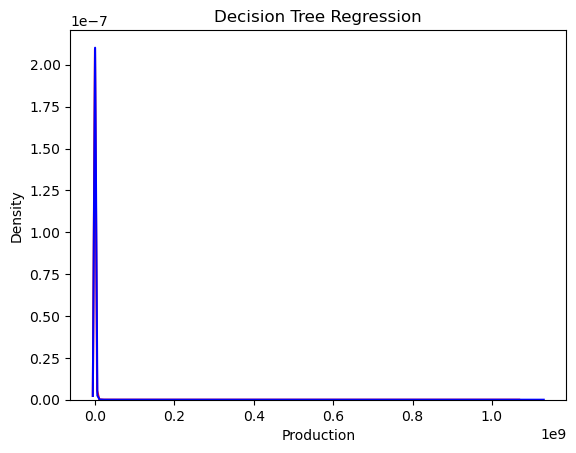

In [34]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

<b> Cross-validation </b> 

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y=y_train, cv = 10)

In [36]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [37]:

# Mean Accuracy and SD of 10 fold results

print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 90.90%
Standard Deviation : 5.59%


<b> Cross-validation </b>

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train)

In [39]:
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)

In [40]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 89.56%
Standard Deviation : 5.81%


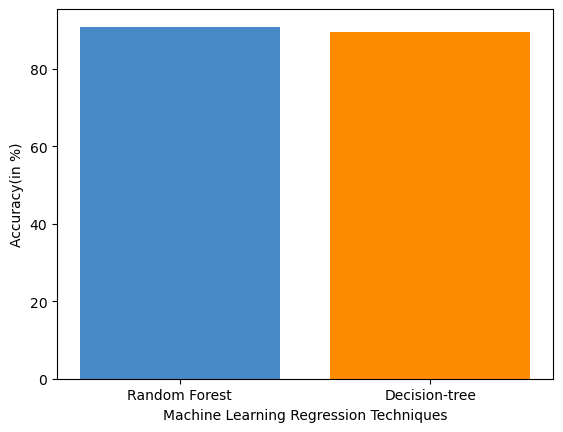

In [41]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

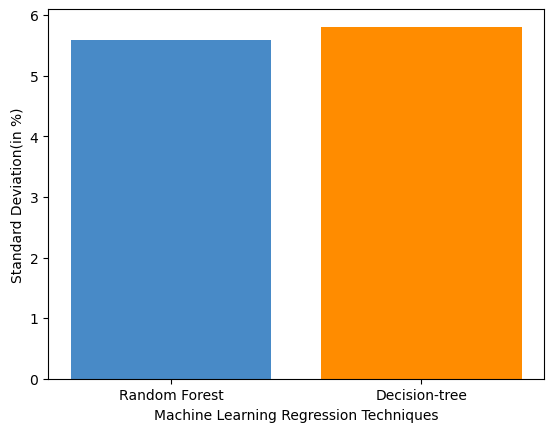

<Figure size 640x480 with 0 Axes>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [b1, b2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

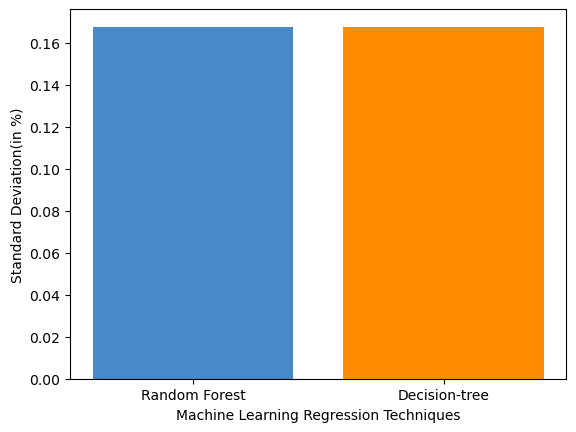

<Figure size 640x480 with 0 Axes>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

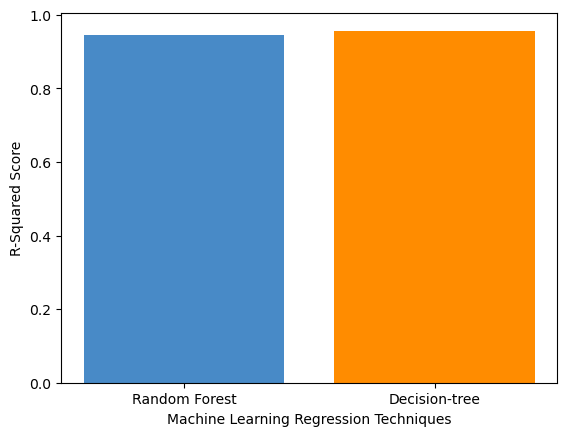

<Figure size 640x480 with 0 Axes>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [r1, r2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

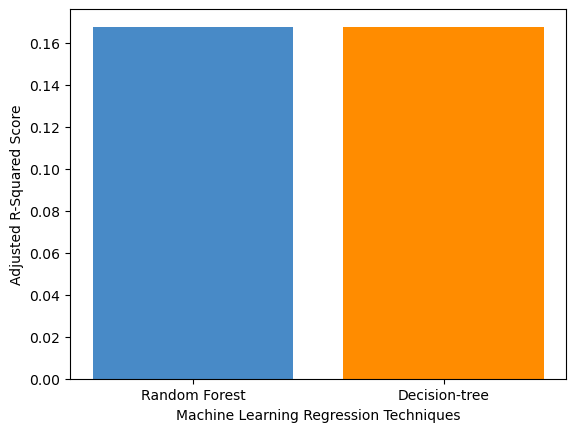

<Figure size 640x480 with 0 Axes>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Adjusted R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

In [49]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)


NameError: name 'y_pred' is not defined

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(rf_predict,y_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

Mean Absolute Error: 115227.06304242605
Mean Squared Error: 15699043403443.953
Root Mean Squared Error: 3962201.837797256


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))
 
# set height of bar
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]
Standard_Deviation = [b1,b2]
 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Accuracy, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Standard_Deviation, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Standard Devation')
 
# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)
 
plt.legend()
plt.show()

<b> Hyperparameter Tuning using GridSearchCV </b>

Random Forest Regression 

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['auto'],
              'kernel': ['rbf','linear']}  
   
reg = GridSearchCV(DecisionTreeRegressor(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
reg.fit(x_train,y_train)
reg.grid_scores_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


ValueError: Invalid parameter C for estimator DecisionTreeRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
# CV results are not easy to use, 
# sklearn provides a way to download these results into a dataframe 
df = pd.DataFrame(reg.cv_results_)
df


In [ ]:
df[['param_C','param_kernel','mean_test_score']]

In [ ]:
reg.best_score_

In [ ]:
reg.best_params_

In [ ]:
# To tackle the computation problem in gridsearch , 
# randomizedsearchcv comes in. Randomly tries value.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(regressor(gamma='auto'),{
    'c': [1,10,20],
    'kernel' : ['rbf','linear']
},
 cv = 5,
 return_train_score=False,
 n_iter=2
)
rs.fit(x_train,y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]


TypeError: 'numpy.ndarray' object is not callable

Decision Tree
